In [18]:
import pandas as pd

import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re


In [2]:
df = pd.read_csv("../check_agreement_topics/sensitive_topics_vers3.csv")

In [3]:
df.head()

,text,offline_crime,online_crime,drugs,gambling,pornography,prostitution,slavery,suicide,terrorism,weapons,body_shaming,health_shaming,politics,racism,religion,sexual_minorities,sexism,social_injustice,source
0,РРРРРРЯЯЯЯЯЯЯ РУССКИЕ ВАНЬКИ НИКОМУ НЕ НУЖНЫ!!...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,toloka
1,Бабы это вообще безхуйные сиськастые ссущие си...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,trtest
2,изнасиловалиа говорила что девственницаЯ так д...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,trtest
3,Взгляните на пизду. Как психически здоровый че...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,toloka
4,так она не шлюха.видно что нищенка и при эт...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,trtest


In [4]:
from collections import Counter
Counter(df['source']).most_common(10)

[('kw', 21656),
 ('toloka', 8766),
 ('self', 1978),
 ('no_kw_manual_relabel', 600),
 ('toloka_real_manual_relabel', 526),
 ('trtest', 378)]

In [5]:
df_kw = df[df['source'] == 'kw']

In [6]:
df_self= df[df['source'].isin(['self','no_kw_manual_relabel'])]

In [7]:
df_toloka= df[df['source'].isin(['toloka','toloka_real_manual_relabel','trtest'])]

In [8]:
def get_count(df):
    
    def round_up(val):
        if float(val) > 0.5:
            return 1
        return 0

    df_count = pd.DataFrame()
    for c in topics:
        if c != 'text':
            df_count[c] = df[c].apply(round_up)
            
    counts = []
    names = []
    for col in df_count.columns:
        cnt = sum(df_count[col])
        counts.append(cnt)
        names.append(col)
        
    df_count_fin = pd.DataFrame({'class':names, 'count':counts})
    df_count_fin_sorted = df_count_fin.sort_values('class', ascending = False)
    return df_count_fin_sorted

In [19]:
topics = sorted(['offline_crime', 'online_crime', 'drugs', 'gambling', 'pornography',
       'prostitution', 'slavery', 'suicide', 'terrorism', 'weapons',
       'body_shaming', 'health_shaming', 'politics', 'racism', 'religion',
       'sexual_minorities', 'sexism', 'social_injustice'], reverse=True)

topics = [re.sub("_"," ",el) for el in topics]

topics

['weapons',
 'terrorism',
 'suicide',
 'social injustice',
 'slavery',
 'sexual minorities',
 'sexism',
 'religion',
 'racism',
 'prostitution',
 'pornography',
 'politics',
 'online crime',
 'offline crime',
 'health shaming',
 'gambling',
 'drugs',
 'body shaming']

In [11]:
df_kw_CNT = get_count(df_kw)
df_self_CNT = get_count(df_self)
df_toloka_CNT = get_count(df_toloka)

In [12]:
df_kw_CNT.head()

,class,count
0,weapons,736
1,terrorism,1041
2,suicide,371
3,social_injustice,826
4,slavery,844


In [ ]:
np.array([2*i for i in range(len(df_kw_CNT))])

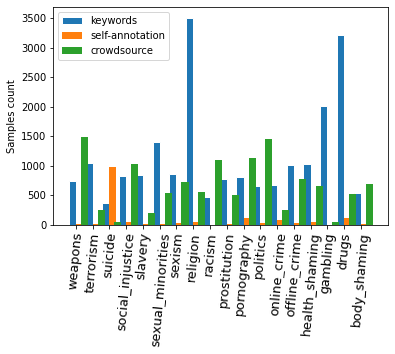

In [31]:
# plt.figure(figsize=(16,14))

fig, ax = plt.subplots()
topic_width = 0.85
# x_topics = np.arange(len(df_kw_CNT))
x_topics = np.array([2*i for i in range(len(df_kw_CNT))])


# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.bar(x_topics - topic_width/2, df_kw_CNT['count'].tolist(), topic_width, label='keywords', capsize=2,edgecolor = 'white')
ax.bar(x_topics + topic_width/2, df_self_CNT['count'].tolist(), topic_width, label='self-annotation', capsize=2,)
ax.bar(x_topics + topic_width*1.2 , df_toloka_CNT['count'].tolist(), topic_width, label='crowdsource', capsize=2,)

# rects2 = ax.bar(x_topics + topic_width/2, multi_dataset_count, topic_width, color='r', label = 'Sensitive dataset')

ax.set_xticks(x_topics)
ax.set_xticklabels(df_kw_CNT['class'].tolist())

plt.xticks(rotation = 85, fontsize=13)
ax.set_ylabel('Samples count')
# ax.set_title('Scores by group and gender')
ax.legend(loc='best')

# ax.legend(bbox_to_anchor=(0.15, 1.1), loc='upper left',fontsize=12)

# 

plt.show()
# plt.savefig("multilabel_source_plot.pdf",format='pdf', bbox_inches='tight')

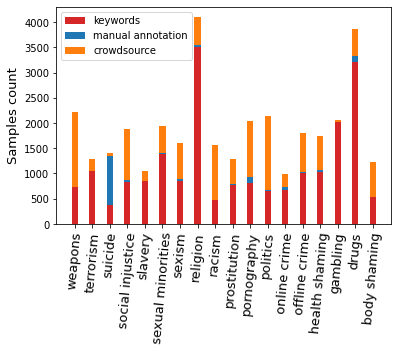

In [21]:
import numpy as np
import matplotlib.pyplot as plt

menMeans = np.array((20, 35, 30, 35, 27))
womenMeans = np.array((25, 32, 34, 20, 25))
childrenMeans = np.array((21, 30, 32, 10, 36))

kw = np.array(df_kw_CNT['count'].tolist())
self =  np.array(df_self_CNT['count'].tolist())
toloka = np.array(df_toloka_CNT['count'].tolist())

ind = np.arange(5)    
width = 0.35       

p1 = plt.bar(topics, kw, width, color='#d62728', )
p2 = plt.bar(topics, self, width,  bottom=kw)
p3 = plt.bar(topics, toloka, width,  bottom=self+kw)

plt.xticks(rotation = 85, fontsize=13)
plt.ylabel('Samples count', fontsize=13)

plt.legend((p1[0], p2[0], p3[0]), ('keywords', 'manual annotation', "crowdsource"))

# plt.show()
plt.savefig("multilabel_source_plot.pdf",format='pdf', bbox_inches='tight')

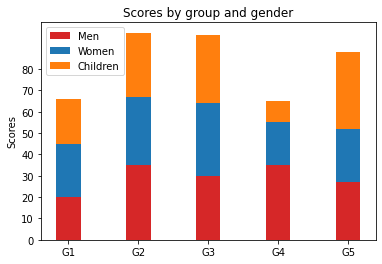

In [7]:
import numpy as np
import matplotlib.pyplot as plt


menMeans = np.array((20, 35, 30, 35, 27))
womenMeans = np.array((25, 32, 34, 20, 25))
childrenMeans = np.array((21, 30, 32, 10, 36))

ind = np.arange(5)    
width = 0.35       

p1 = plt.bar(ind, menMeans, width, color='#d62728', )
p2 = plt.bar(ind, womenMeans, width,  bottom=menMeans)
p3 = plt.bar(ind, childrenMeans, width,  bottom=menMeans+womenMeans)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Men', 'Women', "Children"))

plt.show()

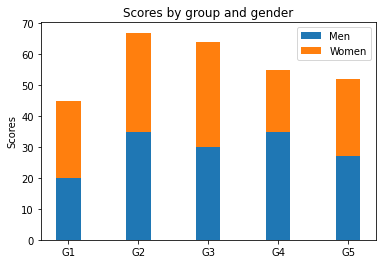

In [6]:
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
lgbt_means = [25, 32, 34, 20, 25]

lgbt_women_means = [w + l for w,l in zip(women_means, lgbt_means)]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label='Men')
ax.bar(labels, women_means, width, bottom=men_means, label='Women')
# ax.bar(labels, lgbt_means, width, bottom=lgbt_women_means, label='lgbt')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()